In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

$\Large Graphical \ Representation \ of \ Competitive \ Ballistic \ Deposition$

In [2]:
def graphic_cbd(num_bins: int=500, num_particles: int=100_000, color_change: int=10_000, num_colors: int=3):
    """
    Generates Graphical Data for Competitive Ballistic Deposition.
    
    num_bins, num_particles: The parameters of the ballistic deposition are determined.

    color_change: The color of the graph will change every time this many particles are deposited.

    num_colors: The number of colors that will be used to plot the points.
    """


    # The height of every bin will be changed randomly with the deposition of a particle at every instance of time.
    h = np.zeros(num_bins, dtype=int)
    # The zeroth particle in the middle of the image (the seed from which the sample grows):
    h[num_bins//2] = 1
    # The pixels that will be used to graph the image are initialized to zero:
    image_matrix = np.zeros((num_particles, num_bins), dtype=int)
    # The main part of the code:
    for i in range(num_particles):
        bin = np.random.randint(num_bins)
        # Change the color of the particles.
        # +1, so that it won't be the same as the background color.
        if (i%color_change)==0:
            color = int(((i//color_change) % num_colors) + 1)
        # Check the height of the neighbors and decide accordingly:     
        if h[bin] < h[(bin-1)%num_bins] or h[bin] < h[(bin+1)%num_bins]:
            h[bin] = max(h[(bin-1)%num_bins], h[(bin+1)%num_bins])
        # Get rid of particles that fall too far and don't stick to others.
        elif h[bin]==0:
            continue
        else:
            # With the deposition of a particle, the height of the bin increases by 1:
            h[bin] += 1
        # The matrix of the pixels of the image is filled with [0,1,2,...,num_colors] for determining the color:
        image_matrix[h[bin], bin] = color
    return image_matrix

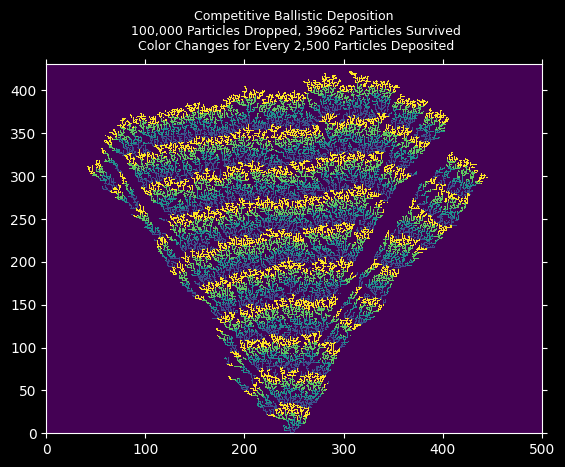

In [3]:
num_bins = 500
num_particles = 100_000
color_change = 2_500

image_matrix = graphic_cbd(color_change=color_change, num_colors=4, num_particles=num_particles, num_bins=num_bins)

# The plot is initialized:
fig, ax = plt.subplots()
ax.clear()
# plt.imshow() is very efficient and significantly faster than other plotting methods.
ax.imshow(image_matrix, aspect="auto", interpolation="nearest")
ax.set_xlim((0,num_bins))
ax.set_ylim(0, np.nonzero(image_matrix)[0][-1]+10)
ax.set_title(f"Competitive Ballistic Deposition\n \
100,000 Particles Dropped, {np.sum(image_matrix>0)} Particles Survived\n \
Color Changes for Every 2,500 Particles Deposited", fontsize=9, pad=10);

$\Large Finding \ the \ Correlation \ Length$

In [4]:
"""
100,000 Particles Dropped on 500 Bins, 100 Samples are Grown,
Width of Every Sample Measured 20 times as the sample grows.
"""


# The number of "stems" that are "grown" to be studied:
num_samples = 100  # 100 samples take 20 seconds.
# The number of times we look at each sample and write down its width, as it grows:
num_snapshots = 20

width_data = np.zeros((num_samples, num_snapshots), dtype=int)
for i in range (num_samples):
    # Grow a sample:
    image_matrix = graphic_cbd()
    # By looking at the plots of graphic_cbd(), 300 seems to be a good limit
    # for measuring the width. So the width of the sample is recorded in 20 equally spaced places
    # from bottom (image_matrix[15]) to top (image_matrix[300]) of the sample.
    for snapshot in range(num_snapshots):
        width_data[i, snapshot] = (np.nonzero(image_matrix[(300//num_snapshots)*(snapshot+1)]))[0][-1] - (np.nonzero(image_matrix[(300//num_snapshots)*(snapshot+1)]))[0][0]

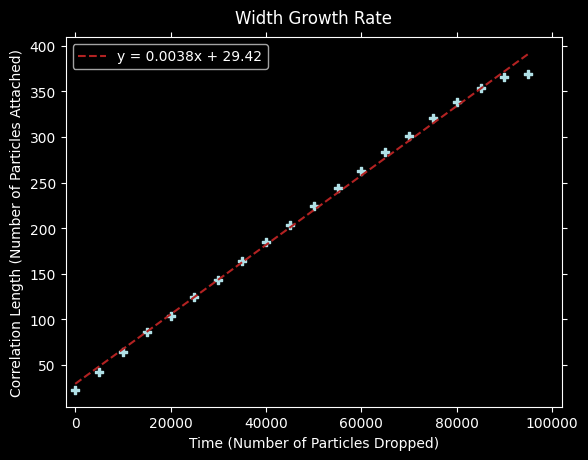

In [18]:
x = np.arange(1, 100_001, 100_000//num_snapshots)
y = np.mean(width_data, axis=0)

coefs = np.polynomial.polynomial.polyfit(x, y, deg=1)
ffit = np.polynomial.polynomial.polyval(x, coefs)


fig, ax = plt.subplots()
ax.clear()
ax.set_title("Width Growth Rate", pad=10)
ax.set_xlabel("Time (Number of Particles Dropped)")
ax.set_ylabel("Correlation Length (Number of Particles Attached)")
ax.set_xlim((-2000, 102000))
ax.scatter(x, y, marker="P", color="powderblue")
ax.plot(x, ffit, color="firebrick", linestyle="--", label=f"y = {coefs[1]:.4f}x + {coefs[0]:.2f}")
ax.legend();

In [19]:
# fig.savefig("CorrelationLength.jpg")